# Data Preparation
Tasks

    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

In [84]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.manifold import TSNE
from datetime import datetime, date
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
warnings.filterwarnings('ignore')


    
## 1.Clean_Preprocess_selection Data

In [85]:
# Read spreadsheet and assign it to swiss_loan
swiss_loan= pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/Assignement/ATUCE_Case_study_data_2021.xlsx')
# Create a boolean mask on whether each feature less than 40% missing values.
mask = swiss_loan.isna().sum() / len(swiss_loan) < 0.4
# Create a reduced dataset by applying the mask
reduced_df =swiss_loan.loc[:, mask]

# drop ID
reduced_df.drop('ID', axis=1, inplace=True)
reduced_df['Pays_corr']=reduced_df['Pays'].str.strip()
reduced_df['Taux_corr']=reduced_df['Taux'].str.replace('%','').str.strip().str.replace(',','.').str.extract(r'(\d+.\d+)')
reduced_df['Taux_corr'] = np.where(reduced_df['Taux_corr'].isnull(), 0, reduced_df['Taux_corr'])
reduced_df['Taux_corr'] = pd.to_numeric(reduced_df['Taux_corr'], errors='coerce')
# Specify the boundaries of the bins
bins = [-np.inf,5.5,  6.5, 10]
# Bin labels
labels = [ 'Low', 'Medium', 'High']
# Bin the continuous variable ConvertedSalary using these boundaries
reduced_df['Taux_corr_binned'] = pd.cut(reduced_df['Taux_corr'], 
                                         bins=bins,labels=labels )
# Print the first 5 rows of the boundary_binned column
reduced_df['Montant_corr']=reduced_df['Montant'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Montant_corr'] = np.where(reduced_df['Montant_corr'].isnull(), 0, reduced_df['Montant_corr'])
reduced_df['Montant_corr'] = pd.to_numeric(reduced_df['Montant_corr'], errors='coerce')
reduced_df['Niveau_risque_corr']=reduced_df['Niveau de risque'].str.rstrip().str.replace('\s+','')
Emprunteurs = reduced_df['Emprunteur']


Emprunteurs_counts = Emprunteurs.value_counts()

# Create a mask for only categories that occur less than 5 times
mask = Emprunteurs.isin(Emprunteurs_counts[Emprunteurs_counts<5].index)
# Label all other categories as Other
reduced_df['Emprunteur'][mask] = 'Other'
reduced_df['capital_social_corr']=reduced_df['capital social'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['capital_social_corr'] = np.where(reduced_df['capital_social_corr'].isnull(), 0, reduced_df['capital_social_corr'])
reduced_df['capital_social_corr'] = pd.to_numeric(reduced_df['capital_social_corr'], errors='coerce')

reduced_df['Effectifse_corr']=reduced_df['effectifs'].str.rstrip().str.replace('\s+','')
reduced_df['Effectifse_corr'][reduced_df['Effectifse_corr'] == '-'] = np.nan

reduced_df['Nombre_mois_période16_corr']=reduced_df['Nombre de mois de la période 16'].str.rstrip().str.replace('mois','').str.replace(',','.').str.replace('\s+','').str.extract(r"(\d+\.\d+|\d+)")
reduced_df['Nombre_mois_période16_corr'][reduced_df['Nombre_mois_période16_corr'] == '-'] = np.nan
reduced_df['Nombre_mois_période16_corr'] = pd.to_numeric(reduced_df['Nombre_mois_période16_corr'], errors='coerce')

reduced_df['Chiffre_Affaires_16_corr']=reduced_df.iloc[:,12].str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Chiffre_Affaires_16_corr'] = pd.to_numeric(reduced_df['Chiffre_Affaires_16_corr'], errors='coerce')

reduced_df['Total_Bilan_16_corr']= reduced_df['Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Total_Bilan_16_corr']= pd.to_numeric(reduced_df['Total_Bilan_16_corr'], errors='coerce')

reduced_df['Capacité_remboursement_FCCR_16_corr']= reduced_df['Capacité de remboursement (FCCR) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Capacité_remboursement_FCCR_16_corr']= pd.to_numeric(reduced_df['Capacité_remboursement_FCCR_16_corr'], errors='coerce')


reduced_df['Fonds_Propres_16_corr']= reduced_df['Fonds Propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_16_corr']= pd.to_numeric(reduced_df['Fonds_Propres_16_corr'], errors='coerce')

reduced_df['Fonds_Propres_Total_Bilan_corr']= reduced_df['Fonds Propres / Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_Total_Bilan_corr']= pd.to_numeric(reduced_df['Fonds_Propres_Total_Bilan_corr'], errors='coerce')

reduced_df['Dettes_Nettes_EBE_16_corr']= reduced_df['Dettes Nettes / EBE(* années) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('*','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Dettes_Nettes_EBE_16_corr']= pd.to_numeric(reduced_df['Dettes_Nettes_EBE_16_corr'], errors='coerce')

reduced_df['DettesNettes_Fonds_propres_16_corr']= reduced_df['Dettes Nettes / Fonds propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['DettesNettes_Fonds_propres_16_corr']= pd.to_numeric(reduced_df['DettesNettes_Fonds_propres_16_corr'], errors='coerce')

In [86]:
reduced_df.columns

Index(['Pays', 'Taux', 'Mois', 'Montant', 'Niveau de risque', 'Emprunteur',
       'capital social', 'année de création', 'Antériorité', 'effectifs',
       'Nombre de mois de la période 16', 'Chiffre d'Affaires 16',
       'EBE(retraité des loyers de leasing) 16', 'Resultat Net 16',
       'Total Bilan 16', 'Capacité de remboursement (FCCR) 16',
       'Fonds Propres 16', 'Fonds Propres / Total Bilan 16',
       'Dettes Nettes / EBE(* années) 16', 'Dettes Nettes / Fonds propres 16',
       'Pays_corr', 'Taux_corr', 'Taux_corr_binned', 'Montant_corr',
       'Niveau_risque_corr', 'capital_social_corr', 'Effectifse_corr',
       'Nombre_mois_période16_corr', 'Chiffre_Affaires_16_corr',
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr'],
      dtype='object')

## Keep clean columns :

In [87]:
list_to_keep= [ 'Pays_corr','Mois', 'Taux_corr', 'Taux_corr_binned', 'Montant_corr',
       'Niveau_risque_corr','Emprunteur', 'capital_social_corr', 'Effectifse_corr','année de création',
       'Nombre_mois_période16_corr', 'Chiffre_Affaires_16_corr',
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr']

In [88]:
clean_reduced_df= reduced_df[list_to_keep].copy()
clean_reduced_df.shape

(688, 18)

# EDA After Cleaning :


In [89]:
clean_reduced_df.head(3)

,Pays_corr,Mois,Taux_corr,Taux_corr_binned,Montant_corr,Niveau_risque_corr,Emprunteur,capital_social_corr,Effectifse_corr,année de création,Nombre_mois_période16_corr,Chiffre_Affaires_16_corr,Total_Bilan_16_corr,Capacité_remboursement_FCCR_16_corr,Fonds_Propres_16_corr,Fonds_Propres_Total_Bilan_corr,Dettes_Nettes_EBE_16_corr,DettesNettes_Fonds_propres_16_corr
0,France,48,5.85,Medium,1100000,B,Other,3058500.0,11à50,1962,NaN,NaN,NaN,0.52,NaN,42.92,12.74,125.88
1,Espagne,48,5.50,Low,310000,B+,Other,396072.0,11à50,1985,NaN,NaN,NaN,0.23,NaN,38.70,0.47,21.51
2,Pays-Bas,48,6.45,Medium,165000,B,Other,0.0,1à10,2016,NaN,NaN,NaN,8.94,NaN,1.82,1.02,2870.00


In [90]:
clean_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Pays_corr                            688 non-null    object  
 1   Mois                                 688 non-null    int64   
 2   Taux_corr                            688 non-null    float64 
 3   Taux_corr_binned                     688 non-null    category
 4   Montant_corr                         688 non-null    int64   
 5   Niveau_risque_corr                   688 non-null    object  
 6   Emprunteur                           688 non-null    object  
 7   capital_social_corr                  684 non-null    float64 
 8   Effectifse_corr                      681 non-null    object  
 9   année de création                    688 non-null    int64   
 10  Nombre_mois_période16_corr           247 non-null    float64 
 11  Chiffre_Affaires_16

In [91]:
clean_reduced_df.describe()

,Mois,Taux_corr,Montant_corr,capital_social_corr,année de création,Nombre_mois_période16_corr,Chiffre_Affaires_16_corr,Total_Bilan_16_corr,Capacité_remboursement_FCCR_16_corr,Fonds_Propres_16_corr,Fonds_Propres_Total_Bilan_corr,Dettes_Nettes_EBE_16_corr,DettesNettes_Fonds_propres_16_corr
count,688.000000,688.000000,6.880000e+02,6.840000e+02,688.000000,247.000000,5.600000e+01,2.000000e+02,441.000000,1.300000e+02,451.000000,466.000000,418.000000
mean,45.594477,4.406599,4.886634e+05,1.331022e+07,2001.841570,12.018219,4.867236e+04,2.648892e+05,16.706757,6.200382e+04,48.376563,5.721652,65.119115
std,16.310660,2.831213,6.119570e+05,1.460673e+08,17.602175,1.201571,3.271763e+05,3.380872e+06,244.441467,5.812463e+05,324.776421,78.180867,215.297909
min,3.000000,0.000000,2.000000e+04,0.000000e+00,1712.000000,6.000000,1.037000e+03,2.890000e+02,-29.440000,-2.240000e+01,-336.840000,-15.450000,-1232.890000
25%,36.000000,0.000000,1.000000e+05,1.000000e+04,1994.000000,12.000000,1.898000e+03,2.594000e+03,1.190000,2.050000e+03,17.085000,0.110000,-0.530000
50%,48.000000,5.500000,2.500000e+05,7.700000e+04,2006.000000,12.000000,3.113500e+03,7.568000e+03,1.820000,4.898500e+03,28.100000,1.300000,28.490000
75%,60.000000,6.500000,6.000000e+05,5.712575e+05,2012.000000,12.000000,6.070000e+03,2.813500e+04,3.390000,1.284275e+04,43.700000,2.657500,96.050000
max,84.000000,9.900000,5.000000e+06,2.485450e+09,2019.000000,23.000000,2.453000e+06,4.783400e+07,5122.730000,6.634000e+06,6789.000000,1682.000000,2870.000000


# 2.Data preprocessing
## Log normalization

Transformation Normally distributed features are an assumption in Statistical algorithms. Deep learning & Regression-type algorithms also benefit from normally distributed data. Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ Logarithm transformation.
Helps with skewness No predetermined range for scaled data Useful only **on non-zero, non-negative data**


In [92]:
clean_reduced_df.var(skipna = True)

Mois                                   2.660376e+02
Taux_corr                              8.015765e+00
Montant_corr                           3.744913e+11
capital_social_corr                    2.133567e+16
année de création                      3.098366e+02
Nombre_mois_période16_corr             1.443772e+00
Chiffre_Affaires_16_corr               1.070443e+11
Total_Bilan_16_corr                    1.143029e+13
Capacité_remboursement_FCCR_16_corr    5.975163e+04
Fonds_Propres_16_corr                  3.378473e+11
Fonds_Propres_Total_Bilan_corr         1.054797e+05
Dettes_Nettes_EBE_16_corr              6.112248e+03
DettesNettes_Fonds_propres_16_corr     4.635319e+04
dtype: float64

### Those 2 columns have big varinace let's see if we can reduce the variance  
    Montant_corr  var:                         3.744913e+11
    capital_social_corr  var :                 2.133567e+16
    Chiffre_Affaires_16_corr var:              1.070443e+11

#### Montant_corr_log

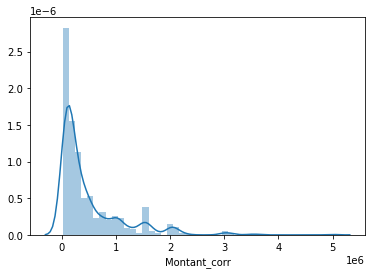

In [93]:
ax = sns.distplot(clean_reduced_df["Montant_corr"])

In [94]:
# Print out the variance 
print(clean_reduced_df['Montant_corr'].var())

# Apply the log normalization function 
clean_reduced_df['Montant_corr_log'] = np.log(clean_reduced_df['Montant_corr'])

# Check the variance of the normalized 
print(clean_reduced_df['Montant_corr_log'].var())

374491335433.83527
1.3603689005002353


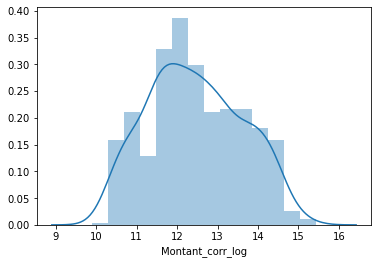

In [95]:
ax = sns.distplot(clean_reduced_df['Montant_corr_log'])

#### Chiffre_Affaires_16_corr_log

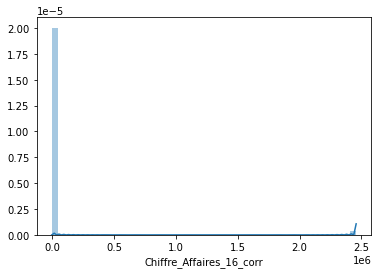

In [96]:
ax = sns.distplot(clean_reduced_df["Chiffre_Affaires_16_corr"])

In [97]:
# Print out the variance 
print(clean_reduced_df['Chiffre_Affaires_16_corr'].var())

# Apply the log normalization function 
clean_reduced_df['Chiffre_Affaires_16_corr_log'] = np.log(clean_reduced_df['Chiffre_Affaires_16_corr'])

# Check the variance of the normalized 
print(clean_reduced_df['Chiffre_Affaires_16_corr_log'].var())

107044335091.32458
1.4420801759163155


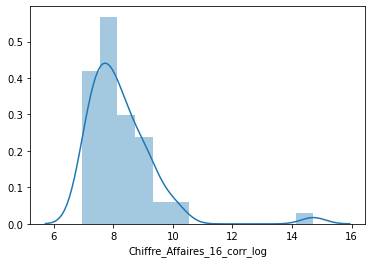

In [98]:
ax = sns.distplot(clean_reduced_df['Chiffre_Affaires_16_corr_log'])

#### capital_social_corr_log

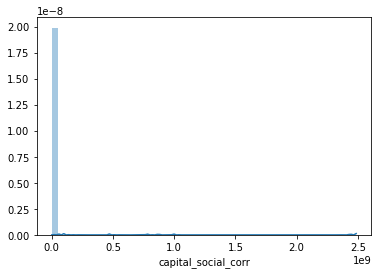

In [99]:
ax = sns.distplot(clean_reduced_df["capital_social_corr"])

In [100]:
# Print out the variance
print(clean_reduced_df['capital_social_corr'].var())

# Apply the log normalization function t
clean_reduced_df['capital_social_corr_log'] = np.log(clean_reduced_df['capital_social_corr']+1)

# Check the variance of the normalized 
print(clean_reduced_df['capital_social_corr_log'].var())

2.133566624374514e+16
9.845596672361404


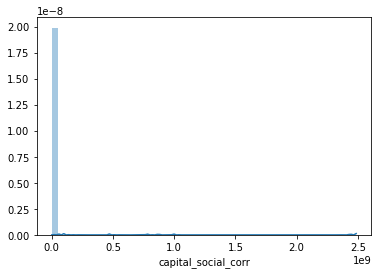

In [101]:
ax = sns.distplot(clean_reduced_df["capital_social_corr"])

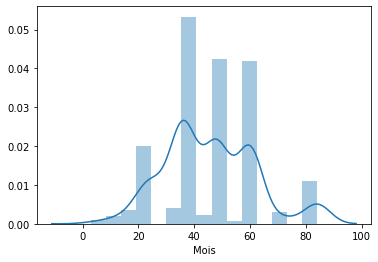

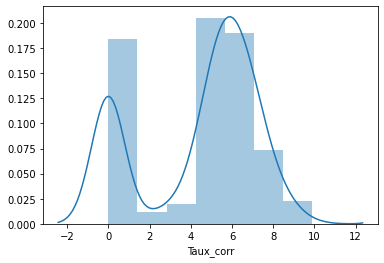

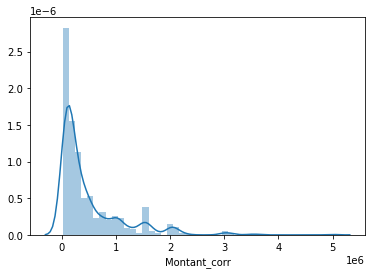

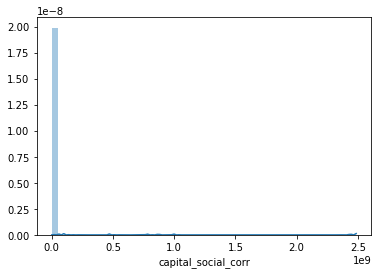

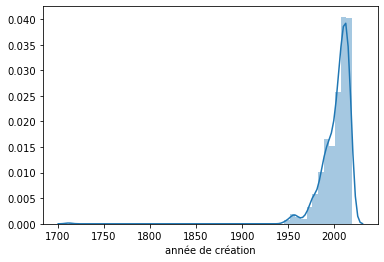

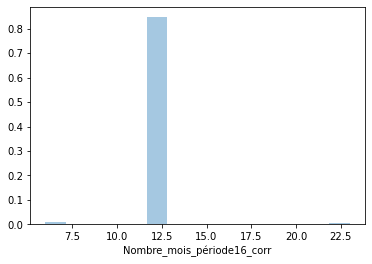

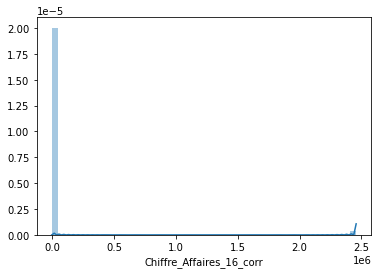

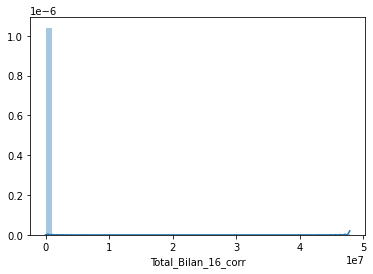

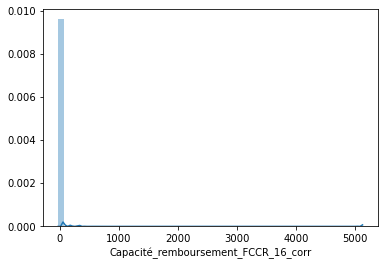

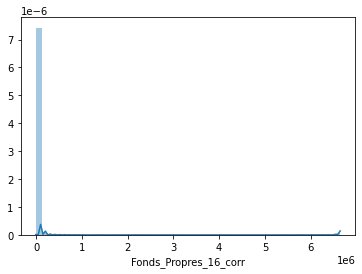

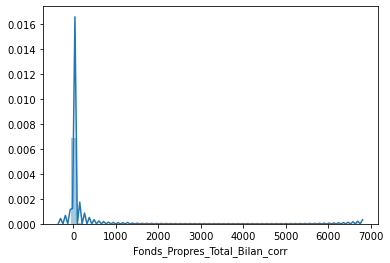

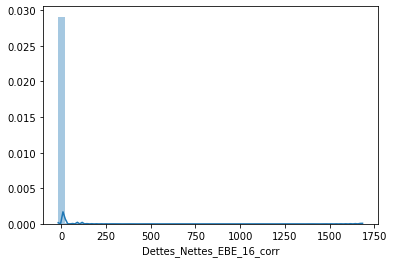

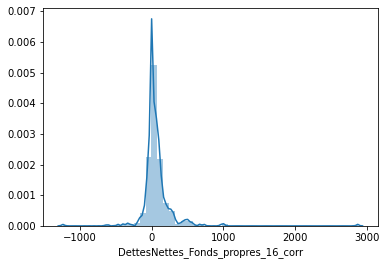

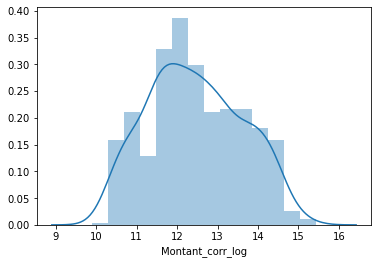

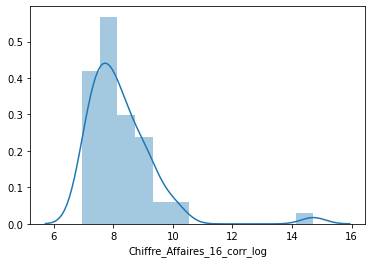

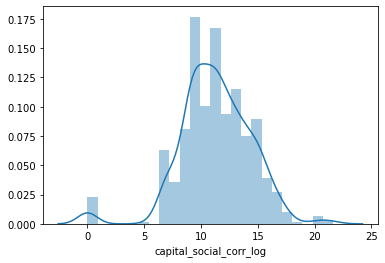

In [102]:
# select the float columns
num_columns = clean_reduced_df.select_dtypes(include=['int64','float64']).columns
# Create a histogram
# create distplots
for column in num_columns:
    plt.figure()         
    sns.distplot(clean_reduced_df[column])

# 3.Feature Engineering
Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning
## Encoding categorical variables
     Pays_corr  
     Taux_corr_binned 
     Niveau_risque_corr 
     Emprunteur 
     Effectifse_corr 

In [103]:
# select non-numeric columns
cat_columns = clean_reduced_df.select_dtypes(exclude=['int64','float64']).columns
cat_columns

Index(['Pays_corr', 'Taux_corr_binned', 'Niveau_risque_corr', 'Emprunteur',
       'Effectifse_corr'],
      dtype='object')

# Create pipeline :Cat colmuns 

In [104]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)

fill_missing_then_one_hot_encoder.fit(clean_reduced_df[cat_columns])

x_encoded =fill_missing_then_one_hot_encoder.transform(clean_reduced_df[cat_columns])

print('C\'est bon')

C'est bon


In [105]:
x_encoded.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

# Create new cloumn age of the company :


In [106]:
# This function converts given date to age
def age(creation):
    born = int(creation)
    today = date.today()
    return today.year - born
  
clean_reduced_df['Age'] = clean_reduced_df['année de création'].apply(age)
clean_reduced_df[['Age','année de création']]

,Age,année de création
0,59,1962
1,36,1985
2,5,2016
3,5,2016
4,18,2003
...,...,...
683,6,2015
684,14,2007
685,22,1999
686,28,1993


# Put all preprocess tasks 

In [107]:
# Create a boolean mask on whether each feature less than 40% missing values.
mask = swiss_loan.isna().sum() / len(swiss_loan) < 0.4
# Create a reduced dataset by applying the mask
reduced_df =swiss_loan.loc[:, mask]

# drop ID
reduced_df.drop('ID', axis=1, inplace=True)
reduced_df['Pays_corr']=reduced_df['Pays'].str.strip()
reduced_df['Taux_corr']=reduced_df['Taux'].str.replace('%','').str.strip().str.replace(',','.').str.extract(r'(\d+.\d+)')
reduced_df['Taux_corr'] = np.where(reduced_df['Taux_corr'].isnull(), 0.1, reduced_df['Taux_corr'])
reduced_df['Taux_corr'] = pd.to_numeric(reduced_df['Taux_corr'], errors='coerce')
# Specify the boundaries of the bins
bins = [0.01,5.5,  6.5, 10]
# Bin labels
labels = [ 'Low', 'Medium', 'High']
# Bin the continuous variable ConvertedSalary using these boundaries
reduced_df['Taux_corr_binned'] = pd.cut(reduced_df['Taux_corr'], 
                                         bins=bins,labels=labels )
# Print the first 5 rows of the boundary_binned column
reduced_df['Montant_corr']=reduced_df['Montant'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Montant_corr'] = np.where(reduced_df['Montant_corr'].isnull(), 0.1, reduced_df['Montant_corr'])
reduced_df['Montant_corr'] = pd.to_numeric(reduced_df['Montant_corr'], errors='coerce')
reduced_df['Niveau_risque_corr']=reduced_df['Niveau de risque'].str.rstrip().str.replace('\s+','')
Emprunteurs = reduced_df['Emprunteur']


Emprunteurs_counts = Emprunteurs.value_counts()

# Create a mask for only categories that occur less than 5 times
mask = Emprunteurs.isin(Emprunteurs_counts[Emprunteurs_counts<5].index)
# Label all other categories as Other
reduced_df['Emprunteur'][mask] = 'Other'
reduced_df['capital_social_corr']=reduced_df['capital social'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['capital_social_corr'] = np.where(reduced_df['capital_social_corr'].isnull(), 0.1, reduced_df['capital_social_corr'])
reduced_df['capital_social_corr'] = pd.to_numeric(reduced_df['capital_social_corr'], errors='coerce')

reduced_df['Effectifse_corr']=reduced_df['effectifs'].str.rstrip().str.replace('\s+','')
reduced_df['Effectifse_corr'][reduced_df['Effectifse_corr'] == '-'] = np.nan

reduced_df['Nombre_mois_période16_corr']=reduced_df['Nombre de mois de la période 16'].str.rstrip().str.replace('mois','').str.replace(',','.').str.replace('\s+','').str.extract(r"(\d+\.\d+|\d+)")
reduced_df['Nombre_mois_période16_corr'][reduced_df['Nombre_mois_période16_corr'] == '-'] = np.nan
reduced_df['Nombre_mois_période16_corr'] = pd.to_numeric(reduced_df['Nombre_mois_période16_corr'], errors='coerce')

reduced_df['Chiffre_Affaires_16_corr']=reduced_df.iloc[:,12].str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Chiffre_Affaires_16_corr'] = pd.to_numeric(reduced_df['Chiffre_Affaires_16_corr'], errors='coerce')

reduced_df['Total_Bilan_16_corr']= reduced_df['Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Total_Bilan_16_corr']= pd.to_numeric(reduced_df['Total_Bilan_16_corr'], errors='coerce')

reduced_df['Capacité_remboursement_FCCR_16_corr']= reduced_df['Capacité de remboursement (FCCR) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Capacité_remboursement_FCCR_16_corr']= pd.to_numeric(reduced_df['Capacité_remboursement_FCCR_16_corr'], errors='coerce')


reduced_df['Fonds_Propres_16_corr']= reduced_df['Fonds Propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_16_corr']= pd.to_numeric(reduced_df['Fonds_Propres_16_corr'], errors='coerce')

reduced_df['Fonds_Propres_Total_Bilan_corr']= reduced_df['Fonds Propres / Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_Total_Bilan_corr']= pd.to_numeric(reduced_df['Fonds_Propres_Total_Bilan_corr'], errors='coerce')

reduced_df['Dettes_Nettes_EBE_16_corr']= reduced_df['Dettes Nettes / EBE(* années) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('*','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Dettes_Nettes_EBE_16_corr']= pd.to_numeric(reduced_df['Dettes_Nettes_EBE_16_corr'], errors='coerce')

reduced_df['DettesNettes_Fonds_propres_16_corr']= reduced_df['Dettes Nettes / Fonds propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['DettesNettes_Fonds_propres_16_corr']= pd.to_numeric(reduced_df['DettesNettes_Fonds_propres_16_corr'], errors='coerce')


# Apply the log normalization function 
reduced_df['Montant_corr_log'] = np.log(reduced_df['Montant_corr'])

# Apply the log normalization function 
reduced_df['Chiffre_Affaires_16_corr_log'] = np.log(reduced_df['Chiffre_Affaires_16_corr'])
# Apply the log normalization function t
reduced_df['capital_social_corr_log'] = np.log(reduced_df['capital_social_corr']+1)
# This function converts given date to age
def age(creation):
    born = int(creation)
    today = date.today()
    return today.year - born
  
reduced_df['Age'] = reduced_df['année de création'].apply(age)
list_to_keep= [ 'Pays_corr','Mois','Age' ,'Taux_corr', 'Taux_corr_binned', 'Montant_corr_log',
       'Niveau_risque_corr','Emprunteur', 'capital_social_corr_log', 'Effectifse_corr',
       'Nombre_mois_période16_corr', 
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr','Chiffre_Affaires_16_corr_log']
clean_reduced_df= reduced_df[list_to_keep].copy()
clean_reduced_df.shape


(688, 18)

In [108]:
clean_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Pays_corr                            688 non-null    object  
 1   Mois                                 688 non-null    int64   
 2   Age                                  688 non-null    int64   
 3   Taux_corr                            688 non-null    float64 
 4   Taux_corr_binned                     688 non-null    category
 5   Montant_corr_log                     688 non-null    float64 
 6   Niveau_risque_corr                   688 non-null    object  
 7   Emprunteur                           688 non-null    object  
 8   capital_social_corr_log              684 non-null    float64 
 9   Effectifse_corr                      681 non-null    object  
 10  Nombre_mois_période16_corr           247 non-null    float64 
 11  Total_Bilan_16_corr

In [109]:
clean_reduced_df.isnull().sum()

Pays_corr                                0
Mois                                     0
Age                                      0
Taux_corr                                0
Taux_corr_binned                         0
Montant_corr_log                         0
Niveau_risque_corr                       0
Emprunteur                               0
capital_social_corr_log                  4
Effectifse_corr                          7
Nombre_mois_période16_corr             441
Total_Bilan_16_corr                    488
Capacité_remboursement_FCCR_16_corr    247
Fonds_Propres_16_corr                  558
Fonds_Propres_Total_Bilan_corr         237
Dettes_Nettes_EBE_16_corr              222
DettesNettes_Fonds_propres_16_corr     270
Chiffre_Affaires_16_corr_log           632
dtype: int64

# Target vs predictors 


In [110]:
# Create arrays for the features and the response variable
classification_cible = "Taux_corr_binned"
regresiion_cible= "Taux_corr"
y = clean_reduced_df['Taux_corr_binned']
X = clean_reduced_df.drop(['Taux_corr','Taux_corr_binned'], axis=1)
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

69 rows in test set vs. 619 in training set. 16 Features.


## Num Vs cat columns 

In [111]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns

##  Handle  Outliers : num_clumns 
### Percentage based outlier removal

One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

In [112]:
X[num_columns].describe()

,Mois,Age,Montant_corr_log,capital_social_corr_log,Nombre_mois_période16_corr,Total_Bilan_16_corr,Capacité_remboursement_FCCR_16_corr,Fonds_Propres_16_corr,Fonds_Propres_Total_Bilan_corr,Dettes_Nettes_EBE_16_corr,DettesNettes_Fonds_propres_16_corr,Chiffre_Affaires_16_corr_log
count,688.000000,688.000000,688.000000,684.000000,247.000000,2.000000e+02,441.000000,1.300000e+02,451.000000,466.000000,418.000000,56.000000
mean,45.594477,19.158430,12.444557,11.291858,12.018219,2.648892e+05,16.706757,6.200382e+04,48.376563,5.721652,65.119115,8.246944
std,16.310660,17.602175,1.166349,3.130761,1.201571,3.380872e+06,244.441467,5.812463e+05,324.776421,78.180867,215.297909,1.200866
min,3.000000,2.000000,9.903488,0.095310,6.000000,2.890000e+02,-29.440000,-2.240000e+01,-336.840000,-15.450000,-1232.890000,6.944087
25%,36.000000,9.000000,11.512925,9.210440,12.000000,2.594000e+03,1.190000,2.050000e+03,17.085000,0.110000,-0.530000,7.548092
50%,48.000000,15.000000,12.429216,11.251574,12.000000,7.568000e+03,1.820000,4.898500e+03,28.100000,1.300000,28.490000,8.043481
75%,60.000000,27.000000,13.304685,13.255597,12.000000,2.813500e+04,3.390000,1.284275e+04,43.700000,2.657500,96.050000,8.711029
max,84.000000,309.000000,15.424948,21.633720,23.000000,4.783400e+07,5122.730000,6.634000e+06,6789.000000,1682.000000,2870.000000,14.712822


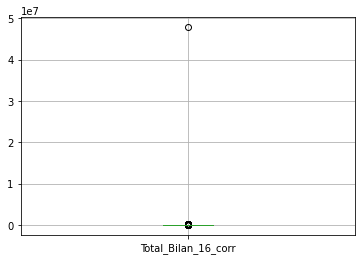

In [113]:
X[['Total_Bilan_16_corr']].boxplot()

In [114]:
X[['Total_Bilan_16_corr']].describe()

,Total_Bilan_16_corr
count,2.000000e+02
mean,2.648892e+05
std,3.380872e+06
min,2.890000e+02
25%,2.594000e+03
50%,7.568000e+03
75%,2.813500e+04
max,4.783400e+07


In [115]:
quantile = X[num_columns].quantile(0.95)
quantile

Mois                                       84.000000
Age                                        45.000000
Montant_corr_log                           14.346139
capital_social_corr_log                    15.894952
Nombre_mois_période16_corr                 12.000000
Total_Bilan_16_corr                    124723.950000
Capacité_remboursement_FCCR_16_corr        14.610000
Fonds_Propres_16_corr                   39474.750000
Fonds_Propres_Total_Bilan_corr             74.655000
Dettes_Nettes_EBE_16_corr                   6.447500
DettesNettes_Fonds_propres_16_corr        319.304500
Chiffre_Affaires_16_corr_log                9.893772
Name: 0.95, dtype: float64

# Trim the outliers

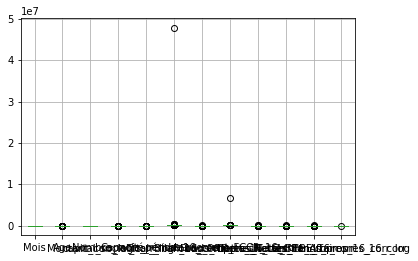

In [116]:
# Find the mean and standard dev
std = X[num_columns].std()
mean = X[num_columns].mean()

# Calculate the cutoff
cut_off = std *3.5
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = X[(X[num_columns] < upper) \
                           & (X[num_columns] > lower)]

# The trimmed box plot
X[num_columns].boxplot()
plt.show()

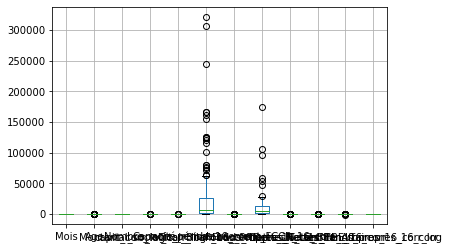

In [117]:
# The trimmed box plot
trimmed_df[num_columns].boxplot()
plt.show()

In [118]:
trimmed_df.shape

(688, 16)

In [119]:
trimmed_df.describe()

,Mois,Age,Montant_corr_log,capital_social_corr_log,Nombre_mois_période16_corr,Total_Bilan_16_corr,Capacité_remboursement_FCCR_16_corr,Fonds_Propres_16_corr,Fonds_Propres_Total_Bilan_corr,Dettes_Nettes_EBE_16_corr,DettesNettes_Fonds_propres_16_corr,Chiffre_Affaires_16_corr_log
count,688.000000,687.000000,688.000000,670.000000,242.000000,199.000000,440.000000,129.000000,449.000000,465.000000,414.000000,55.000000
mean,45.594477,18.736536,12.444557,11.525815,11.997934,25848.396985,5.102159,11058.114729,30.596503,2.116753,57.015749,8.129383
std,16.310660,13.698509,1.166349,2.707126,0.447441,46988.500926,19.090410,20982.172605,27.702812,7.520577,139.547013,0.824921
min,3.000000,2.000000,9.903488,5.303305,8.000000,289.000000,-29.440000,-22.400000,-336.840000,-15.450000,-619.380000,6.944087
25%,36.000000,9.000000,11.512925,9.308251,12.000000,2592.000000,1.190000,2050.000000,16.990000,0.110000,-0.530000,7.530390
50%,48.000000,15.000000,12.429216,11.289794,12.000000,7502.000000,1.820000,4875.000000,28.090000,1.300000,27.110000,8.036897
75%,60.000000,27.000000,13.304685,13.348832,12.000000,26741.500000,3.382500,12728.000000,43.270000,2.650000,94.782500,8.643150
max,84.000000,74.000000,15.424948,21.633720,16.000000,321188.000000,317.440000,174460.000000,95.710000,120.380000,728.910000,10.230234


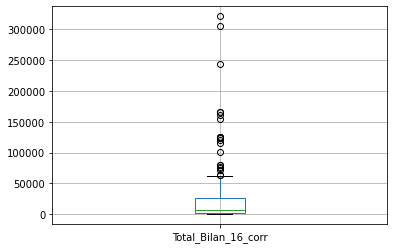

In [120]:
trimmed_df[['Total_Bilan_16_corr']].boxplot()

In [121]:
trimmed_df[['Total_Bilan_16_corr']].describe()

,Total_Bilan_16_corr
count,199.000000
mean,25848.396985
std,46988.500926
min,289.000000
25%,2592.000000
50%,7502.000000
75%,26741.500000
max,321188.000000


# Final Pipe Preprocess 

In [122]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    RobustScaler()
)
data_preprocess_StandardScaler = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_Standar_scaler, num_columns)
)
data_preprocess_RobustScaler = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_RobustScaler, num_columns)
)
X_pre_StandardScaler_trim = data_preprocess_StandardScaler.fit_transform(trimmed_df)
X_pre_RobustScaler_trim = data_preprocess_RobustScaler.fit_transform(trimmed_df)
x_with_outlier_standard =data_preprocess_StandardScaler.fit_transform(X)
x_with_outlier_Robust =data_preprocess_RobustScaler.fit_transform(X)
y_pre = LabelEncoder().fit_transform(clean_reduced_df[['Taux_corr_binned']])
y = clean_reduced_df['Taux_corr']

# Beware the outliers

Outliers are extreme values that fall a long way outside of the other observations. In a small dataset, the impact of an outlier can be much greater, since it will have a heavy weight for the model:


In [123]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(x_with_outlier_standard, y_pre)
x = np.array(isf.predict(x_with_outlier_standard))
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1  49]
 [  1 639]]


**==> we have 49 outliers in our data**

# Let's see if trimming was efficient : 

In [124]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(X_pre_StandardScaler_trim,y)
lasso.score(X_pre_StandardScaler_trim,y)

0.06148633522450009

In [125]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(X_pre_StandardScaler_trim,y)
LinearRegression.score(X_pre_StandardScaler_trim,y)

0.06148909460148788

In [126]:

LinearRegression.fit(x_with_outlier_standard,y)
LinearRegression.score(x_with_outlier_standard,y)

0.13540678280602358

In [127]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(x_with_outlier_standard,y)
lasso.score(x_with_outlier_standard,y)

0.13486525902305158

In [128]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(x_with_outlier_Robust,y)
lasso.score(x_with_outlier_Robust,y)

0.13514726546425038

In [129]:
lasso.fit(X_pre_RobustScaler_trim,y)
lasso.score(X_pre_RobustScaler_trim,y)

0.06145537979667515

**=>In our case , trimming have not a real impact**

# 4.Dimensionality reduction
## The curse of dimensionality

In fact, to avoid overfitting the number of observations should increase exponentially with the number of features. Since this becomes really problematic for high dimensional datasets this phenomenon is known as the curse of dimensionality. The solution to this is of course to apply dimensionality reduction.

While removing outliers consists of deleting rows from the dataset, feature selection consists of deleting columns that do not contribute to the prediction. There is a wide variety of methods, such as analysis of its correlation with the target, importance analysis and recursive elimination.


## Features with low variance

Now use the VarianceThreshold feature selector to remove these features.

In [130]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)
df_numeric_r=X[num_columns]
# Fit the selector to normalized head_df
sel.fit(df_numeric_r / df_numeric_r.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = df_numeric_r.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(df_numeric_r.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 12 to 12.


##  Removing highly correlated features

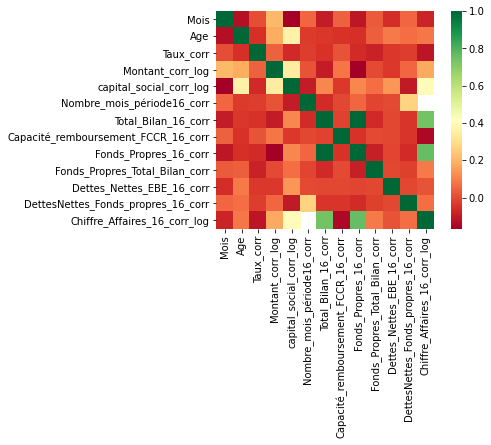

In [131]:
import seaborn as sns 
warnings.filterwarnings("ignore")
sns.heatmap(clean_reduced_df.corr(), square=True, cmap='RdYlGn')

In [132]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = clean_reduced_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = clean_reduced_df.drop(to_drop, axis=1)
print(to_drop)
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

['Total_Bilan_16_corr']
The reduced dataframe has 17 columns.


# Automatic Recursive Feature Elimination
## Mask1

In [133]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,LogisticRegression
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=False),
    RobustScaler())
# Create the RFE with a LogisticRegression estimator and 10 features to select
rfe_LR = RFE(estimator=LogisticRegression(), n_features_to_select = 10, verbose=1)
y1 = LabelEncoder().fit_transform(clean_reduced_df[['Taux_corr_binned']])
X1 = clean_reduced_df.drop(['Taux_corr','Taux_corr_binned'], axis=1)
df_numeric_1=fill_missing_then_RobustScaler.fit_transform(X1[num_columns])

# Fits the eliminator to the data
rfe_LR.fit(df_numeric_1, y1)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X1[num_columns].columns, rfe_LR.ranking_)))
mask_LR=rfe_LR.support_
# Print the features that are not eliminated
print(X1[num_columns].columns[mask_LR])

# Calculates the test set accuracy
acc = accuracy_score(y1, rfe_LR.predict(df_numeric_1))
print("{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 12 features.
Fitting estimator with 11 features.
{'Mois': 1, 'Age': 1, 'Montant_corr_log': 1, 'capital_social_corr_log': 1, 'Nombre_mois_période16_corr': 1, 'Total_Bilan_16_corr': 3, 'Capacité_remboursement_FCCR_16_corr': 1, 'Fonds_Propres_16_corr': 2, 'Fonds_Propres_Total_Bilan_corr': 1, 'Dettes_Nettes_EBE_16_corr': 1, 'DettesNettes_Fonds_propres_16_corr': 1, 'Chiffre_Affaires_16_corr_log': 1}
Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Nombre_mois_période16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_Total_Bilan_corr', 'Dettes_Nettes_EBE_16_corr',
       'DettesNettes_Fonds_propres_16_corr', 'Chiffre_Affaires_16_corr_log'],
      dtype='object')
57.1% accuracy on test set.


# Mask2

In [134]:
# Wrap the feature eliminator around the random forest model
rfe_RFC = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=1)

# Fits the eliminator to the data
rfe_RFC.fit(df_numeric_1, y1)

# Create a mask using an attribute of rfe
mask_RFC = rfe_RFC.support_

# Apply the mask to the feature dataset X and print the result
reduced_num_X = X1[num_columns].loc[:,mask_RFC]
print(reduced_num_X.columns)
# Calculates the test set accuracy
acc = accuracy_score(y1, rfe_RFC.predict(df_numeric_1))
print("{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr'],
      dtype='object')
99.7% accuracy on test set.


# Mask3:


In [135]:
# Select 10 features with RFE on a GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=1, verbose=1)
rfe_gb.fit(df_numeric_1, y1)
# Calculate the R squared on the test set
# Assign the support array to gb_mask
gb_mask = rfe_gb.support_
r_squared = rfe_gb.score(df_numeric_1, y1)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
# Apply the mask to the feature dataset X and print the result
reduced_num_X = X1[num_columns].loc[:,gb_mask]
print(reduced_num_X.columns)


Fitting estimator with 12 features.
Fitting estimator with 11 features.
The model can explain 45.0% of the variance in the test set
Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_Total_Bilan_corr', 'Dettes_Nettes_EBE_16_corr',
       'DettesNettes_Fonds_propres_16_corr', 'Chiffre_Affaires_16_corr_log'],
      dtype='object')


# Combining 3 feature selectors

In [136]:
# Sum the votes of the three models
votes = np.sum([mask_LR, mask_RFC, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X1[num_columns].loc[:, meta_mask]
print(X1[num_columns].columns)
print(X_reduced.columns)

Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Nombre_mois_période16_corr', 'Total_Bilan_16_corr',
       'Capacité_remboursement_FCCR_16_corr', 'Fonds_Propres_16_corr',
       'Fonds_Propres_Total_Bilan_corr', 'Dettes_Nettes_EBE_16_corr',
       'DettesNettes_Fonds_propres_16_corr', 'Chiffre_Affaires_16_corr_log'],
      dtype='object')
Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Capacité_remboursement_FCCR_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr'],
      dtype='object')


In [137]:
print(X_reduced.columns)

Index(['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Capacité_remboursement_FCCR_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr'],
      dtype='object')


In [138]:
temp1=set(X1[num_columns].columns)
s=set(X_reduced.columns)
temp3 = [x for x in temp1 if x not in s]
print("list to drop {}".format(temp3))

list to drop ['Fonds_Propres_16_corr', 'Total_Bilan_16_corr', 'Chiffre_Affaires_16_corr_log', 'Nombre_mois_période16_corr']


In [139]:
list(set(X1[num_columns].columns) - set(X_reduced.columns))

['Total_Bilan_16_corr',
 'Chiffre_Affaires_16_corr_log',
 'Nombre_mois_période16_corr',
 'Fonds_Propres_16_corr']

In [140]:
X1[num_columns][temp3].describe()

,Fonds_Propres_16_corr,Total_Bilan_16_corr,Chiffre_Affaires_16_corr_log,Nombre_mois_période16_corr
count,1.300000e+02,2.000000e+02,56.000000,247.000000
mean,6.200382e+04,2.648892e+05,8.246944,12.018219
std,5.812463e+05,3.380872e+06,1.200866,1.201571
min,-2.240000e+01,2.890000e+02,6.944087,6.000000
25%,2.050000e+03,2.594000e+03,7.548092,12.000000
50%,4.898500e+03,7.568000e+03,8.043481,12.000000
75%,1.284275e+04,2.813500e+04,8.711029,12.000000
max,6.634000e+06,4.783400e+07,14.712822,23.000000


In [141]:
X_reduced = clean_reduced_df.drop(['Taux_corr','Taux_corr_binned', 'Fonds_Propres_16_corr','Chiffre_Affaires_16_corr_log' ,'Total_Bilan_16_corr', 'Nombre_mois_période16_corr'], axis=1)
y = clean_reduced_df['Taux_corr']
# select the float columns
num_columns_red = X_reduced.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns_red =X_reduced.select_dtypes(exclude=['int64','float64']).columns
 
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    RobustScaler()
)
data_preprocess_StandardScaler = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns_red),
    ( fill_missing_then_Standar_scaler, num_columns_red)
)
data_preprocess_RobustScaler = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns_red),
    ( fill_missing_then_RobustScaler, num_columns_red)
)
x_with_outlier_Robust_reduced = data_preprocess_RobustScaler.fit_transform(X_reduced)

LR = LinearRegression()
LR.fit(x_with_outlier_Robust_reduced,y)
LR.score(x_with_outlier_Robust_reduced,y)

0.10312166645906451

In [142]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(x_with_outlier_Robust_reduced,y)
lasso.score(x_with_outlier_Robust_reduced,y)

0.10305631924388625

In [143]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN(n_neighbors=51)
knn.fit(x_with_outlier_Robust_reduced,y)
knn.score(x_with_outlier_Robust_reduced,y)

0.046778937015887534

**==> Reducing features does not improve the result for regression ...**

**==> In the futur we can use : ,SelectKBest,chi2..   and Combining feature selectors**